In [128]:
import numpy as np
import mlrose_hiive as mlrose
import random
import time
import matplotlib.pyplot as plt
from utils import knapsack_generator, fit_iteration_test, time_iteration_test, test_param

In [129]:
#problems

length = 50
fitness_fn_one_max = mlrose.OneMax()
prob_one_max = mlrose.DiscreteOpt(length=length, 
                                  fitness_fn=fitness_fn_one_max
                                 )

length = 64
fitness_fn_four_peaks = mlrose.FourPeaks()#t_pct=0.10
prob_four_peaks = mlrose.DiscreteOpt(length=length, 
                                        fitness_fn=fitness_fn_four_peaks, 
                                        maximize=True
                                       )

length = 64
values, weights = knapsack_generator(length)
max_weight_pct = 0.6
fitness_fn_knapsack = mlrose.Knapsack(weights, values, max_weight_pct)
prob_knapsack = mlrose.DiscreteOpt(length=len(weights), 
                             fitness_fn=fitness_fn_knapsack
                            )


# OneMax

In [152]:
best_r_hill = 0
best_SA = 0
best_GA = 0
best_MIMIC = 0

In [153]:
algorithms = ['r_hill', 'SA', 'GA', 'MIMIC']
one_max_fit_curves = [[], [], [], []]
one_max_times = [0, 0, 0, 0]
one_max_best_fits = [0, 0, 0, 0]



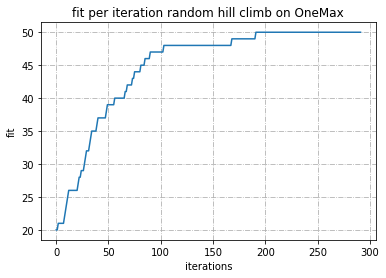

best fitness: 50.0
time: 0.06279897689819336


In [154]:
start_time = time.time()
state, fitness, curve = mlrose.random_hill_climb(problem=prob_one_max,
                                                 curve=True,
                                                 random_state=13,
                                                 max_attempts=100,
                                                 max_iters=10000,
                                                 restarts=10
                                                )
time_elapsed = time.time() - start_time
one_max_fit_curves[0] = curve
one_max_times[0] = time_elapsed
if fitness > one_max_best_fits[0]:
    one_max_best_fits[0] = fitness


plt.plot(curve)
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "fit per iteration random hill climb on FourPeaks"
plt.title(title)
plt.grid(True, linestyle='-.')
plt.show()
print("best fitness:", fitness)
print("time:", time_elapsed)

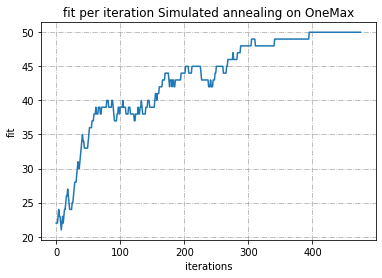

best fitness: 50.0
time: 0.01396322250366211


In [155]:
start_time = time.time()
state, fitness, curve = mlrose.simulated_annealing(problem=prob_one_max,
                                                 curve=True,
                                                 max_attempts=80,
                                                 max_iters=10000, 
                                                 #schedule=mlrose.GeomDecay(init_temp=100, decay=0.95, min_temp=0.001)
                                                 #schedule=mlrose.ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001)
                                                 schedule=mlrose.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001),
                                        
                                                )
time_elapsed = time.time() - start_time
one_max_fit_curves[1] = curve
one_max_times[1] = time_elapsed
if fitness > one_max_best_fits[1]:
    one_max_best_fits[1] = fitness

plt.plot(curve)
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "fit per iteration Simulated annealing on FourPeaks"
plt.title(title)
plt.grid(True, linestyle='-.')
plt.show()
print("best fitness:", fitness)
print("time:", time_elapsed)

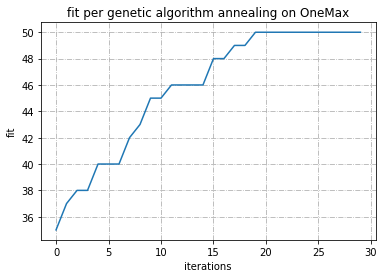

best fitness: 50.0
time: 0.5365638732910156


In [156]:
start_time = time.time()
state, fitness, curve = mlrose.genetic_alg(problem=prob_one_max,
                                                 curve=True,
                                                 random_state=13,
                                                 max_attempts=10,
                                                 max_iters=10000, 
                                                 pop_size=256,
                                                 mutation_prob=0.1,
                                                )
time_elapsed = time.time() - start_time
one_max_fit_curves[2] = curve
one_max_times[2] = time_elapsed
if fitness > one_max_best_fits[2]:
    one_max_best_fits[2] = fitness

plt.plot(curve)
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "fit per genetic algorithm annealing on FourPeaks"
plt.title(title)
plt.grid(True, linestyle='-.')
plt.show()
print("best fitness:", fitness)
print("time:", time_elapsed)

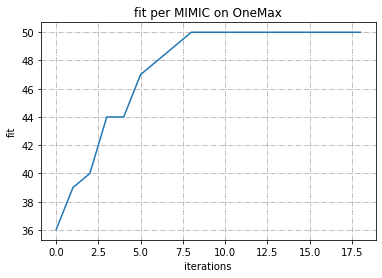

best fitness: 50.0
time: 15.29010796546936


In [157]:
start_time = time.time()
state, fitness, curve = mlrose.mimic(problem=prob_one_max,
                                                 curve=True,
                                                 random_state=13,
                                                 max_attempts=10,
                                                 max_iters=10000, 
                                                 pop_size=256,
                                                 keep_pct=0.3,
                                                )
time_elapsed = time.time() - start_time
one_max_fit_curves[3] = curve
one_max_times[3] = time_elapsed
if fitness > one_max_best_fits[3]:
    one_max_best_fits[3] = fitness

plt.plot(curve)
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "fit per MIMIC on FourPeaks"
plt.title(title)
plt.grid(True, linestyle='-.')
plt.show()
print("best fitness:", fitness)
print("time:", time_elapsed)

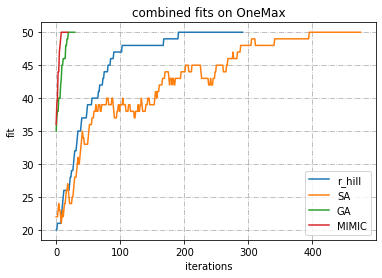

In [158]:
plt.plot(one_max_fit_curves[0], label='r_hill')
plt.plot(one_max_fit_curves[1], label='SA')
plt.plot(one_max_fit_curves[2], label='GA')
plt.plot(one_max_fit_curves[3], label='MIMIC')
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "combined fits on FourPeaks"
plt.title(title)
plt.legend()
plt.grid(True, linestyle='-.')
plt.show()

[0.06279897689819336, 0.01396322250366211, 0.5365638732910156, 15.29010796546936]


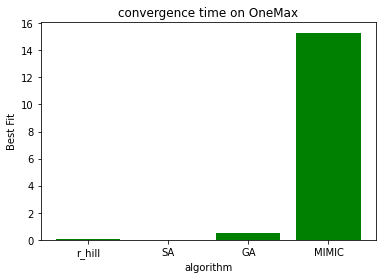

In [159]:
print(one_max_times)
plt.bar("r_hill", one_max_times[0], color='green')
plt.bar("SA", one_max_times[1], color='green')
plt.bar("GA", one_max_times[2], color='green')
plt.bar("MIMIC", one_max_times[3], color='green')
plt.xlabel("algorithm")
plt.ylabel("Best Fit")
plt.title("convergence time on FourPeaks")
axes = plt.gca()

#axes.set_ylim([300,500])
plt.show()

[0.06279897689819336, 0.01396322250366211, 0.5365638732910156, 15.29010796546936]


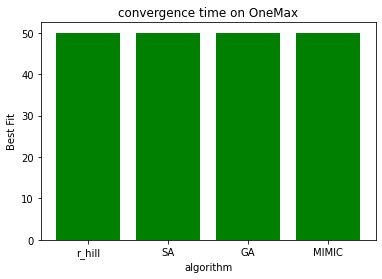

In [160]:
print(one_max_times)
plt.bar("r_hill", one_max_best_fits[0], color='green')
plt.bar("SA", one_max_best_fits[1], color='green')
plt.bar("GA", one_max_best_fits[2], color='green')
plt.bar("MIMIC", one_max_best_fits[3], color='green')
plt.xlabel("algorithm")
plt.ylabel("Best Fit")
plt.title("convergence time on FourPeaks")
axes = plt.gca()

#axes.set_ylim([300,500])
plt.show()

# Four Peaks

In [161]:
best_r_hill = 0
best_SA = 0
best_GA = 0
best_MIMIC = 0

In [162]:
algorithms = ['r_hill', 'SA', 'GA', 'MIMIC']
four_peaks_fit_curves = [[], [], [], []]
four_peaks_times = [0, 0, 0, 0]
four_peaks_best_fits = [0, 0, 0, 0]



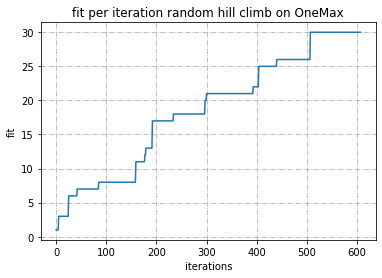

best fitness: 30.0
time: 0.05182337760925293


In [163]:
start_time = time.time()
state, fitness, curve = mlrose.random_hill_climb(problem=prob_four_peaks,
                                                 curve=True,
                                                 random_state=13,
                                                 max_attempts=100,
                                                 max_iters=10000,
                                                 restarts=10
                                                )
time_elapsed = time.time() - start_time
four_peaks_fit_curves[0] = curve
four_peaks_times[0] = time_elapsed
if fitness > four_peaks_best_fits[0]:
    four_peaks_best_fits[0] = fitness


plt.plot(curve)
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "fit per iteration random hill climb on FourPeaks"
plt.title(title)
plt.grid(True, linestyle='-.')
plt.show()
print("best fitness:", fitness)
print("time:", time_elapsed)

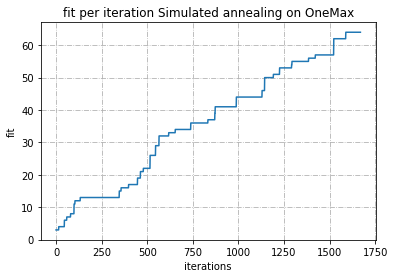

best fitness: 64.0
time: 0.05983781814575195


In [164]:
start_time = time.time()
state, fitness, curve = mlrose.simulated_annealing(problem=prob_four_peaks,
                                                 curve=True,
                                                 max_attempts=80,
                                                 max_iters=10000, 
                                                 #schedule=mlrose.GeomDecay(init_temp=100, decay=0.95, min_temp=0.001)
                                                 #schedule=mlrose.ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001)
                                                 schedule=mlrose.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001),
                                        
                                                )
time_elapsed = time.time() - start_time
four_peaks_fit_curves[1] = curve
four_peaks_times[1] = time_elapsed
if fitness > four_peaks_best_fits[1]:
    four_peaks_best_fits[1] = fitness

plt.plot(curve)
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "fit per iteration Simulated annealing on FourPeaks"
plt.title(title)
plt.grid(True, linestyle='-.')
plt.show()
print("best fitness:", fitness)
print("time:", time_elapsed)

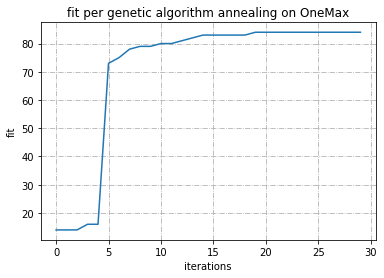

best fitness: 84.0
time: 0.5714712142944336


In [165]:
start_time = time.time()
state, fitness, curve = mlrose.genetic_alg(problem=prob_four_peaks,
                                                 curve=True,
                                                 random_state=13,
                                                 max_attempts=10,
                                                 max_iters=10000, 
                                                 pop_size=256,
                                                 mutation_prob=0.1,
                                                )
time_elapsed = time.time() - start_time
four_peaks_fit_curves[2] = curve
four_peaks_times[2] = time_elapsed
if fitness > four_peaks_best_fits[2]:
    four_peaks_best_fits[2] = fitness

plt.plot(curve)
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "fit per genetic algorithm annealing on FourPeaks"
plt.title(title)
plt.grid(True, linestyle='-.')
plt.show()
print("best fitness:", fitness)
print("time:", time_elapsed)

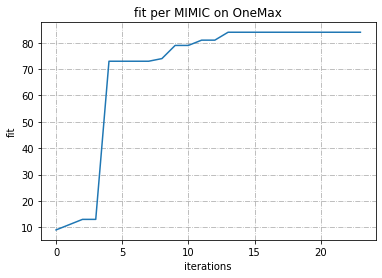

best fitness: 84.0
time: 32.41441893577576


In [166]:
start_time = time.time()
state, fitness, curve = mlrose.mimic(problem=prob_four_peaks,
                                                 curve=True,
                                                 random_state=13,
                                                 max_attempts=10,
                                                 max_iters=10000, 
                                                 pop_size=256,
                                                 keep_pct=0.3,
                                                )
time_elapsed = time.time() - start_time
four_peaks_fit_curves[3] = curve
four_peaks_times[3] = time_elapsed
if fitness > four_peaks_best_fits[3]:
    four_peaks_best_fits[3] = fitness

plt.plot(curve)
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "fit per MIMIC on FourPeaks"
plt.title(title)
plt.grid(True, linestyle='-.')
plt.show()
print("best fitness:", fitness)
print("time:", time_elapsed)

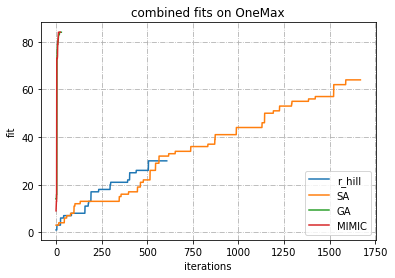

In [167]:
plt.plot(four_peaks_fit_curves[0], label='r_hill')
plt.plot(four_peaks_fit_curves[1], label='SA')
plt.plot(four_peaks_fit_curves[2], label='GA')
plt.plot(four_peaks_fit_curves[3], label='MIMIC')
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "combined fits on FourPeaks"
plt.title(title)
plt.legend()
plt.grid(True, linestyle='-.')
plt.show()

[0.05182337760925293, 0.05983781814575195, 0.5714712142944336, 32.41441893577576]


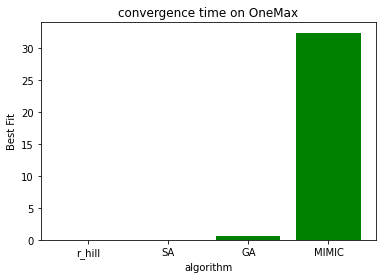

In [168]:
print(four_peaks_times)
plt.bar("r_hill", four_peaks_times[0], color='green')
plt.bar("SA", four_peaks_times[1], color='green')
plt.bar("GA", four_peaks_times[2], color='green')
plt.bar("MIMIC", four_peaks_times[3], color='green')
plt.xlabel("algorithm")
plt.ylabel("Best Fit")
plt.title("convergence time on FourPeaks")
axes = plt.gca()

#axes.set_ylim([300,500])
plt.show()

[0.05182337760925293, 0.05983781814575195, 0.5714712142944336, 32.41441893577576]


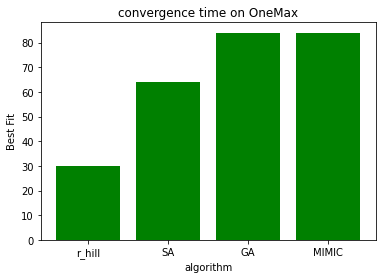

In [169]:
print(four_peaks_times)
plt.bar("r_hill", four_peaks_best_fits[0], color='green')
plt.bar("SA", four_peaks_best_fits[1], color='green')
plt.bar("GA", four_peaks_best_fits[2], color='green')
plt.bar("MIMIC", four_peaks_best_fits[3], color='green')
plt.xlabel("algorithm")
plt.ylabel("Best Fit")
plt.title("best fit on FourPeaks")
axes = plt.gca()

#axes.set_ylim([300,500])
plt.show()

# Knapsack

In [170]:
algorithms = ['r_hill', 'SA', 'GA', 'MIMIC']
knapsack_fit_curves = [[], [], [], []]
knapsack_times = [0, 0, 0, 0]
knapsack_best_fits = [0, 0, 0, 0]



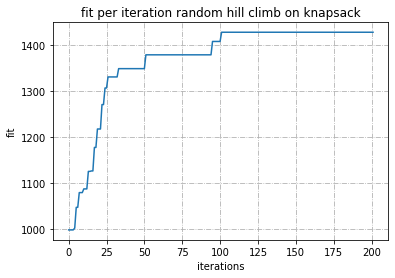

best fitness: 1427.0
time: 0.0638430118560791


In [171]:
start_time = time.time()
state, fitness, curve = mlrose.random_hill_climb(problem=prob_knapsack,
                                                 curve=True,
                                                 random_state=13,
                                                 max_attempts=100,
                                                 max_iters=10000,
                                                 restarts=10
                                                )
time_elapsed = time.time() - start_time
knapsack_fit_curves[0] = curve
knapsack_times[0] = time_elapsed
if fitness > knapsack_best_fits[0]:
    knapsack_best_fits[0] = fitness


plt.plot(curve)
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "fit per iteration random hill climb on knapsack"
plt.title(title)
plt.grid(True, linestyle='-.')
plt.show()
print("best fitness:", fitness)
print("time:", time_elapsed)

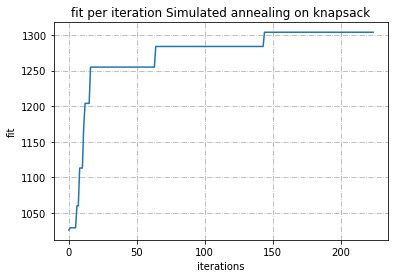

best fitness: 1304.0
time: 0.010939598083496094


In [172]:
start_time = time.time()
state, fitness, curve = mlrose.simulated_annealing(problem=prob_knapsack,
                                                 curve=True,
                                                 max_attempts=80,
                                                 max_iters=10000, 
                                                 #schedule=mlrose.GeomDecay(init_temp=100, decay=0.95, min_temp=0.001)
                                                 #schedule=mlrose.ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001)
                                                 schedule=mlrose.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001),
                                        
                                                )
time_elapsed = time.time() - start_time
knapsack_fit_curves[1] = curve
knapsack_times[1] = time_elapsed
if fitness > knapsack_best_fits[1]:
    knapsack_best_fits[1] = fitness

plt.plot(curve)
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "fit per iteration Simulated annealing on knapsack"
plt.title(title)
plt.grid(True, linestyle='-.')
plt.show()
print("best fitness:", fitness)
print("time:", time_elapsed)

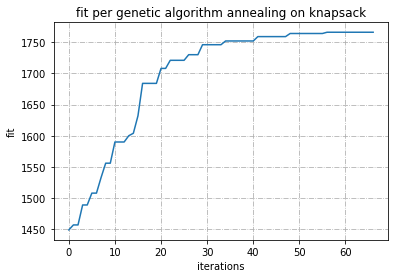

best fitness: 1766.0
time: 1.5617918968200684


In [189]:
start_time = time.time()
state, fitness, curve = mlrose.genetic_alg(problem=prob_knapsack,
                                                 curve=True,
                                                 random_state=13,
                                                 max_attempts=10,
                                                 max_iters=10000, 
                                                 pop_size=256,
                                                 mutation_prob=0.5,
                                                )
time_elapsed = time.time() - start_time
knapsack_fit_curves[2] = curve
knapsack_times[2] = time_elapsed
if fitness > knapsack_best_fits[2]:
    knapsack_best_fits[2] = fitness

plt.plot(curve)
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "fit per genetic algorithm annealing on knapsack"
plt.title(title)
plt.grid(True, linestyle='-.')
plt.show()
print("best fitness:", fitness)
print("time:", time_elapsed)

best fitness: 1769.0
time: 38.29262328147888


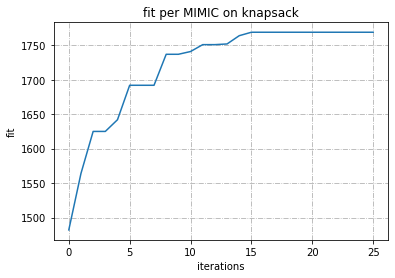

In [186]:
start_time = time.time()
state, fitness, curve = mlrose.mimic(problem=prob_knapsack,
                                                 curve=True,
                                                 random_state=13,
                                                 max_attempts=10,
                                                 max_iters=10000, 
                                                 pop_size=2048,
                                                 keep_pct=0.35,
                                                )
time_elapsed = time.time() - start_time
knapsack_fit_curves[3] = curve
knapsack_times[3] = time_elapsed
if fitness > knapsack_best_fits[3]:
    knapsack_best_fits[3] = fitness

print("best fitness:", fitness)
print("time:", time_elapsed)    
    
plt.plot(curve)
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "fit per MIMIC on knapsack"
plt.title(title)
plt.grid(True, linestyle='-.')
plt.show()


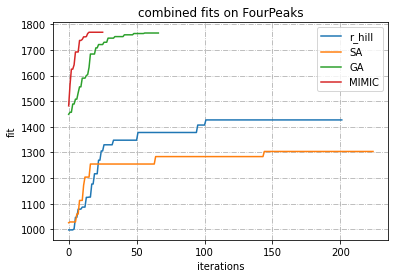

In [190]:
plt.plot(knapsack_fit_curves[0], label='r_hill')
plt.plot(knapsack_fit_curves[1], label='SA')
plt.plot(knapsack_fit_curves[2], label='GA')
plt.plot(knapsack_fit_curves[3], label='MIMIC')
plt.xlabel('iterations')
plt.ylabel('fit')
#plt.legend()
title = "combined fits on knapsack"
plt.title(title)
plt.legend()
plt.grid(True, linestyle='-.')
plt.show()

[0.0638430118560791, 0.010939598083496094, 1.3354237079620361, 30.899362325668335]


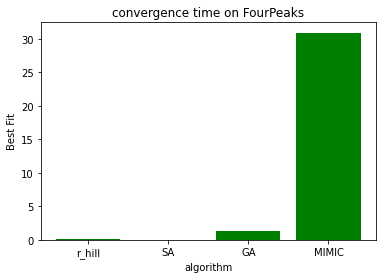

In [176]:
print(knapsack_times)
plt.bar("r_hill", knapsack_times[0], color='green')
plt.bar("SA", knapsack_times[1], color='green')
plt.bar("GA", knapsack_times[2], color='green')
plt.bar("MIMIC", knapsack_times[3], color='green')
plt.xlabel("algorithm")
plt.ylabel("Best Fit")
plt.title("convergence time on knapsack")
axes = plt.gca()

#axes.set_ylim([300,500])
plt.show()

[0.0638430118560791, 0.010939598083496094, 1.3354237079620361, 30.899362325668335]


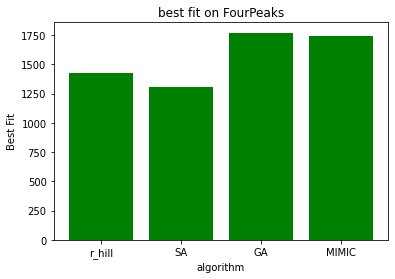

In [177]:
print(knapsack_times)
plt.bar("r_hill", knapsack_best_fits[0], color='green')
plt.bar("SA", knapsack_best_fits[1], color='green')
plt.bar("GA", knapsack_best_fits[2], color='green')
plt.bar("MIMIC", knapsack_best_fits[3], color='green')
plt.xlabel("algorithm")
plt.ylabel("Best Fit")
plt.title("best fit on knapsack")
axes = plt.gca()

#axes.set_ylim([300,500])
plt.show()